# DataKind Red Cross Project ACS Block Data Analysis 



In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation

In [3]:
acs_block_df = pd.read_csv('../../data/ACS 5YR Block Group Data.csv', dtype = {'GEOID': int})

In [4]:
acs_block_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217739 entries, 0 to 217738
Columns: 116 entries, GEOID to house_val_more_2M
dtypes: float64(105), int64(8), object(3)
memory usage: 192.7+ MB


In [5]:
acs_block_df.head()

,GEOID,county_name,state_name,NAME,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,...,house_val_175K_200K,house_val_200K_250K,house_val_250K_300K,house_val_300K_400K,house_val_400K_500K,house_val_500K_750K,house_val_750K_1M,house_val_1M_1.5M,house_val_1.5M_2M,house_val_more_2M
0,530020000000,Adams County,Washington,"Block Group 1, Census Tract 9501, Adams County...",842,64,0.076010,28484.0,0.738717,0.494062,...,0.109705,0.084388,0.177215,0.113924,0.0,0.054852,0.000000,0.029536,0.0,0.0
1,530020000000,Adams County,Washington,"Block Group 2, Census Tract 9501, Adams County...",922,94,0.101952,29939.0,0.737219,0.572597,...,0.083077,0.040000,0.027692,0.012308,0.0,0.000000,0.009231,0.000000,0.0,0.0
2,530020000000,Adams County,Washington,"Block Group 3, Census Tract 9501, Adams County...",515,99,0.192233,18968.0,0.738832,0.541237,...,0.039735,0.059603,0.026490,0.026490,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,530020000000,Adams County,Washington,"Block Group 1, Census Tract 9502, Adams County...",530,65,0.122642,23378.0,0.783019,0.443396,...,0.032258,0.021505,0.016129,0.016129,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,530020000000,Adams County,Washington,"Block Group 2, Census Tract 9502, Adams County...",679,158,0.232695,25441.0,0.886598,0.587629,...,0.012658,0.132911,0.031646,0.031646,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
acs_block_df.describe()

,GEOID,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,...,house_val_175K_200K,house_val_200K_250K,house_val_250K_300K,house_val_300K_400K,house_val_400K_500K,house_val_500K_750K,house_val_750K_1M,house_val_1M_1.5M,house_val_1.5M_2M,house_val_more_2M
count,2.177390e+05,217739.000000,217739.000000,216314.000000,216587.000000,216690.000000,216690.000000,216690.000000,217739.000000,216651.000000,...,213107.000000,213107.000000,213107.000000,213107.000000,213107.000000,213107.000000,213107.000000,213107.000000,213107.000000,213107.000000
mean,2.811822e+11,1437.723894,209.656263,0.156150,31092.353433,0.820715,0.527010,0.161280,993.260941,0.014791,...,0.054042,0.091575,0.072041,0.097725,0.057429,0.068056,0.027333,0.015337,0.005570,0.008354
std,1.572133e+11,941.476495,229.937147,0.143361,17928.409440,0.129407,0.094103,0.100303,622.742649,0.026049,...,0.077440,0.111541,0.097304,0.135768,0.105300,0.137247,0.081249,0.058961,0.031812,0.050374
min,1.001020e+10,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.311310e+11,869.000000,59.000000,0.049865,19939.000000,0.746894,0.478873,0.095142,611.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.805900e+11,1236.000000,139.000000,0.113314,27173.000000,0.816441,0.527906,0.146168,864.000000,0.002981,...,0.024465,0.055769,0.035503,0.039024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.104200e+11,1768.000000,283.000000,0.220801,37130.000000,0.888683,0.577240,0.205620,1224.000000,0.019668,...,0.083624,0.143453,0.112154,0.149096,0.071429,0.063362,0.000000,0.000000,0.000000,0.000000
max,5.604600e+11,51676.000000,8037.000000,1.000000,342903.000000,2.000000,1.000000,1.000000,39486.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
len(acs_block_df.NAME.unique())

217739

In [7]:
acs_block_df.shape[1], (acs_block_df.shape[1] - 4) / 5 

(116, 22.4)

In [8]:
no_of_cols = 5
no_of_rows = math.ceil((acs_block_df.shape[1] - 4) / no_of_cols)
print(no_of_rows)

23


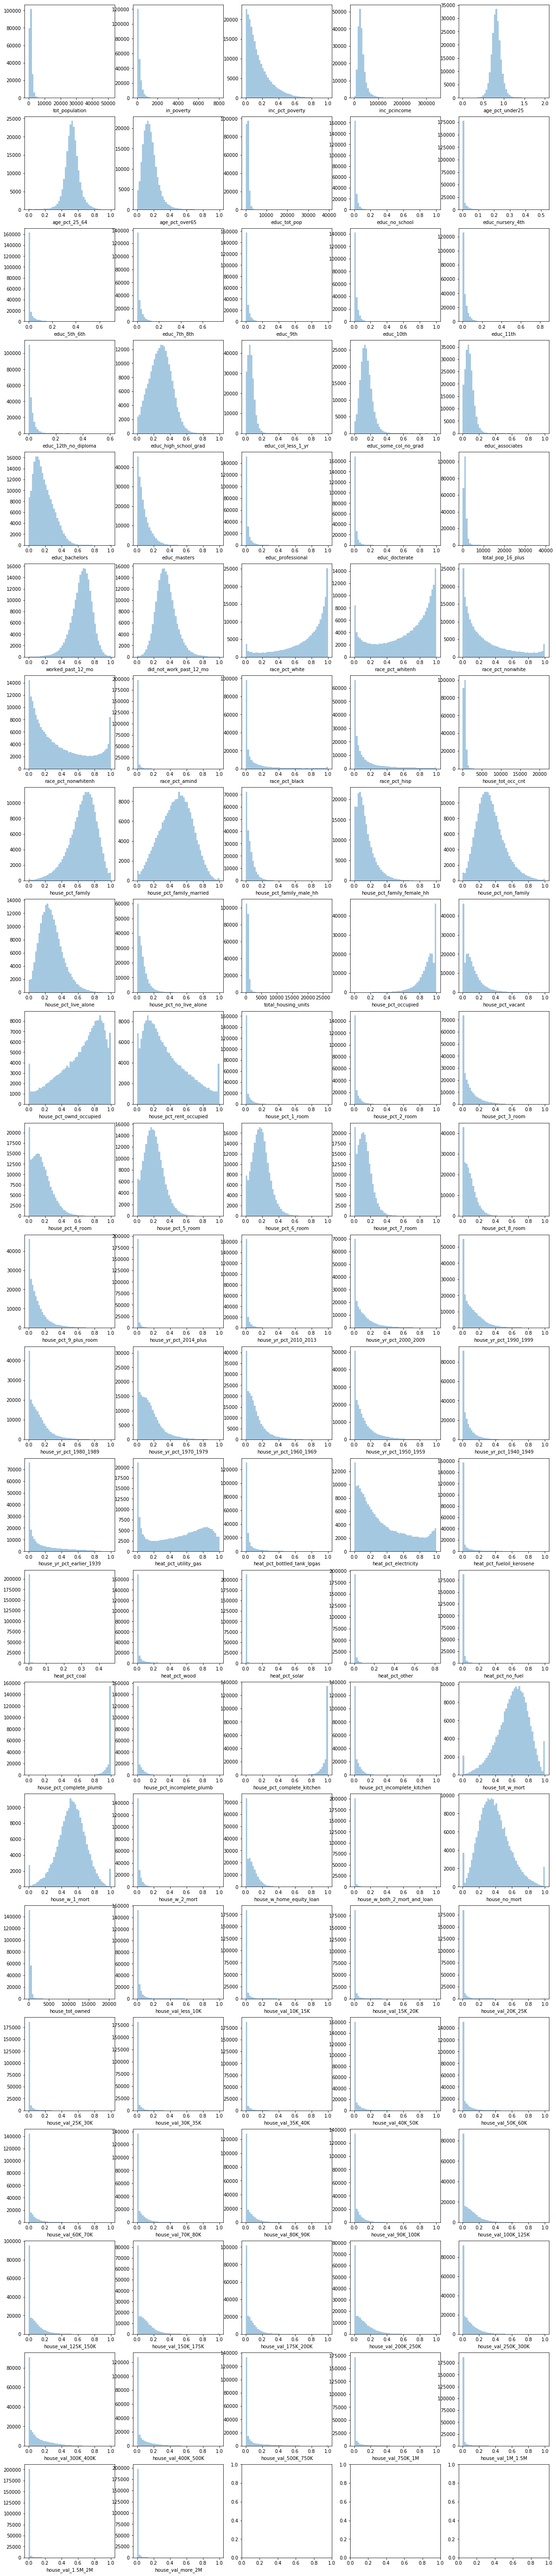

In [19]:
fig, axs = plt.subplots(no_of_rows, no_of_cols, figsize = [20, 100])
for i in range(no_of_rows):
    for j in range(no_of_cols):
        c = (i * no_of_cols) + j + 4
        if c < acs_block_df.shape[1]:
            sns.distplot(acs_block_df.iloc[:, c].dropna(), kde = False, ax = axs[i, j])
plt.savefig('../../data/acs_block_col_dist')

In [19]:
acs_block_df.loc[acs_block_df.tot_population == 0].count()

GEOID                  1425
county_name            1425
state_name             1425
NAME                   1425
tot_population         1425
                       ... 
house_val_500K_750K       0
house_val_750K_1M         0
house_val_1M_1.5M         0
house_val_1.5M_2M         0
house_val_more_2M         0
Length: 116, dtype: int64

In [20]:
acs_block_df = acs_block_df.loc[acs_block_df.tot_population != 0] 

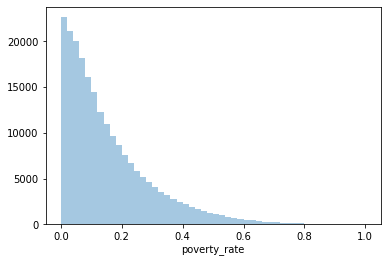

In [21]:
acs_block_df['poverty_rate'] = acs_block_df.in_poverty / acs_block_df.tot_population
sns.distplot(acs_block_df.poverty_rate, kde = False)

In [23]:
acs_block_df[['poverty_rate', 'inc_pct_poverty']].head(20)

,poverty_rate,inc_pct_poverty
0,0.076010,0.076010
1,0.101952,0.101952
2,0.192233,0.192233
3,0.122642,0.122642
4,0.232695,0.232695
5,0.081420,0.081420
6,0.486772,0.486772
7,0.188058,0.188058
8,0.192929,0.192929
9,0.101382,0.101382


In [25]:
acs_block_df['sum_of_age_brackets'] = acs_block_df.age_pct_under25 + acs_block_df.age_pct_25_64 + acs_block_df.age_pct_over65

In [26]:
acs_block_df.sum_of_age_brackets.head(20)

0     1.399050
1     1.537832
2     1.489691
3     1.500000
4     1.558174
5     1.446764
6     1.534318
7     1.483259
8     1.546503
9     1.538961
10    1.362405
11    1.501620
12    1.529915
13    1.493475
14    1.473401
15    1.481397
16    1.606061
17    1.540225
18    1.453282
19    1.523688
Name: sum_of_age_brackets, dtype: float64